# Problem:
Create a ML model that help doctor determine the Admission Type

Task: Classification <br>
Input: Patient Data <br>
Output: Admission Type Categories <br>
Impact: Reduce time of hospital to determine <br>

# FEATURE ENGINEERING
1. Loading Data from KaggleHub
2. Determining the Input and Output
3. Transforming Data

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("prasad22/healthcare-dataset")

print("Path to dataset files:", path)


100%|██████████| 2.91M/2.91M [00:00<00:00, 4.66MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/prasad22/healthcare-dataset/versions/2


In [2]:
import os
import pandas as pd

files = os.listdir(path)
print("Files:", files)

# Pick a CSV file (for example the first one)
csv_path = os.path.join(path, files[0])

# Load into pandas DataFrame
health_df = pd.read_csv(csv_path)

print(health_df.head())

Files: ['healthcare_dataset.csv']
            Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   M

In [3]:
# Selected Feature for the Project
Features = ["Age", "Blood Type", "Gender", "Medical Condition"]

In [4]:
print(Features.copy().append("Admission Type"))

None


In [5]:
import sklearn


encoded_dictionary = {}
Features_column = []
encoded_column = Features.copy()
encoded_column.remove("Age")
print(encoded_column)
for feature in encoded_column + ["Admission Type"]:
  le = sklearn.preprocessing.LabelEncoder()
  name = "encoded_"+feature
  Features_column.append(name)
  health_df[name] = le.fit_transform(health_df[feature])
  encoded_map = {cls: idx for cls, idx in enumerate(le.classes_)}
  encoded_dictionary.update({name: encoded_map})
  print("Done")


['Blood Type', 'Gender', 'Medical Condition']
Done
Done
Done
Done


In [6]:
encoded_dictionary

{'encoded_Blood Type': {0: 'A+',
  1: 'A-',
  2: 'AB+',
  3: 'AB-',
  4: 'B+',
  5: 'B-',
  6: 'O+',
  7: 'O-'},
 'encoded_Gender': {0: 'Female', 1: 'Male'},
 'encoded_Medical Condition': {0: 'Arthritis',
  1: 'Asthma',
  2: 'Cancer',
  3: 'Diabetes',
  4: 'Hypertension',
  5: 'Obesity'},
 'encoded_Admission Type': {0: 'Elective', 1: 'Emergency', 2: 'Urgent'}}

In [7]:
Features_column

['encoded_Blood Type',
 'encoded_Gender',
 'encoded_Medical Condition',
 'encoded_Admission Type']

In [8]:
health_df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,encoded_Blood Type,encoded_Gender,encoded_Medical Condition,encoded_Admission Type
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,5,1,2,2
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,0,1,5,1
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,1,0,5,1
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,6,0,3,0
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal,2,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal,6,0,1,0
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal,3,0,5,0
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal,4,0,4,2
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal,7,1,0,0


In [9]:
X = health_df[Features_column]
y = health_df['encoded_Admission Type']

In [10]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y)

In [11]:
class MachineLearningPipeline():
  def __init__(self, model) -> None:
    self.model = model

  def fit(self, X_train, y_train):
    self.model.fit(X_train, y_train)

  def predict(self, X):
    y_pred = self.model.predict(X)
    y_proba = self.model.predict_proba(X)


    return y_pred, y_proba


In [12]:
DT = MachineLearningPipeline(sklearn.tree.DecisionTreeClassifier())
NB = MachineLearningPipeline(sklearn.naive_bayes.GaussianNB())

NB.fit(X_train, y_train)

In [13]:
NB.model

GaussianNB()

In [14]:
y_pred= NB.predict(X_test)

In [15]:
y_pred

(array([1, 0, 0, ..., 1, 0, 0]),
 array([[0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        ...,
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.]]))

In [16]:
y_pred[0]

array([1, 0, 0, ..., 1, 0, 0])

<Axes: >

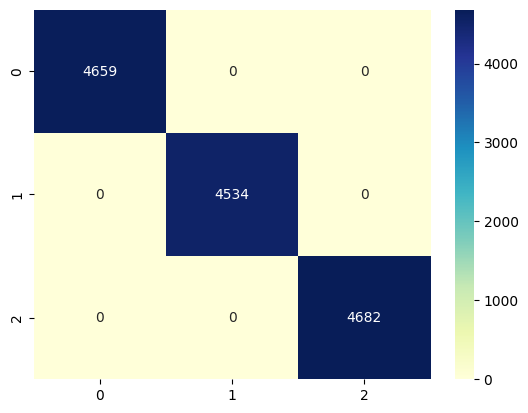

In [17]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred[0])
sns.heatmap(cm, annot=True, cmap="YlGnBu" ,fmt='g')

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred[0]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4659
           1       1.00      1.00      1.00      4534
           2       1.00      1.00      1.00      4682

    accuracy                           1.00     13875
   macro avg       1.00      1.00      1.00     13875
weighted avg       1.00      1.00      1.00     13875



Model Comparision


In [19]:
import sklearn.metrics

class ModelComparision():
  def __init__(self, models) -> None:
    self.models = models
    self.models_train = []

  def train(self, X_train, y_train):
    for model in self.models.copy():
      model.fit(X_train, y_train)
      self.models_train.append(model)
    return self.models_train

  def test(self, X_test, y_test):
    # Defining Metrics array
    accuracy = []
    f1_score = []
    precision = []
    recall = []

    for model in self.models_train:
      y_pred, y_proba = model.predict(X_test)  # Extract predicted labels and probabilities
      accuracy.append(sklearn.metrics.accuracy_score(y_test, y_pred))
      precision.append(sklearn.metrics.precision_score(y_test, y_pred, average='weighted')) # Added average='weighted' for multiclass
      recall.append(sklearn.metrics.recall_score(y_test, y_pred, average='weighted')) # Added average='weighted' for multiclass
      f1_score.append(sklearn.metrics.f1_score(y_test, y_pred, average='weighted')) # Added average='weighted' for multiclass

    return {
        'model': [model.model for model in self.models_train], # Extract the model object itself
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1_score}

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Assuming you have your custom pipeline wrapper
DT = MachineLearningPipeline(DecisionTreeClassifier())
NB = MachineLearningPipeline(GaussianNB())
RF = MachineLearningPipeline(RandomForestClassifier(n_estimators=100, random_state=42))
LR = MachineLearningPipeline(LogisticRegression(max_iter=1000))
SVM = MachineLearningPipeline(SVC(probability=True))

# Add all models to a list
models = [DT, NB, RF, LR, SVM]

# Compare models
comparision = ModelComparision(models)



In [ ]:
comparision.train(X_train, y_train)

In [ ]:
for model in comparision.models_train:
  print(model)

In [ ]:
test_result = comparision.test(X_test, y_test)

In [ ]:
len(test_result)

In [ ]:
import pandas as pd


df = pd.DataFrame(test_result).round(3)

# Print in classification_report style
header = f"{'Model':<25} {'Accuracy':>8} {'Precision':>10} {'Recall':>8} {'F1-score':>9}"
print(header)
print("="*len(header))

for i, row in df.iterrows():
    print(f"{str(row['model']):<25} "
          f"{row['accuracy']:>8.3f} "
          f"{row['precision']:>10.3f} "
          f"{row['recall']:>8.3f} "
          f"{row['f1']:>9.3f}")
